In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import io
import warnings
warnings.filterwarnings(action = "ignore",category=FutureWarning)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
# reading through colab session
dataset = pd.read_csv(io.BytesIO(uploaded['train.csv']))
dataset.head()
dataset.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

# Data Analysis

Missing Values

In [5]:
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1 ]
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
for feature in features_with_na:
  print(f"{feature} {dataset[feature].isnull().sum()} {np.round(dataset[feature].isnull().mean(),4)} missing values")

LotFrontage 259 0.1774 missing values
Alley 1369 0.9377 missing values
MasVnrType 8 0.0055 missing values
MasVnrArea 8 0.0055 missing values
BsmtQual 37 0.0253 missing values
BsmtCond 37 0.0253 missing values
BsmtExposure 38 0.026 missing values
BsmtFinType1 37 0.0253 missing values
BsmtFinType2 38 0.026 missing values
FireplaceQu 690 0.4726 missing values
GarageType 81 0.0555 missing values
GarageYrBlt 81 0.0555 missing values
GarageFinish 81 0.0555 missing values
GarageQual 81 0.0555 missing values
GarageCond 81 0.0555 missing values
PoolQC 1453 0.9952 missing values
Fence 1179 0.8075 missing values
MiscFeature 1406 0.963 missing values


In [7]:
dataset[dataset.isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Handling Missing Values

Text(0.5, 1.0, 'LotFrontage')

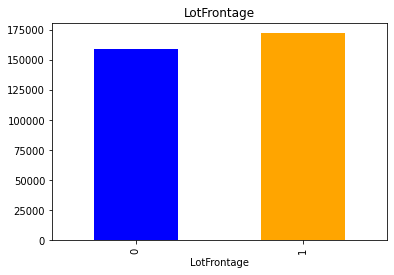

Text(0.5, 1.0, 'Alley')

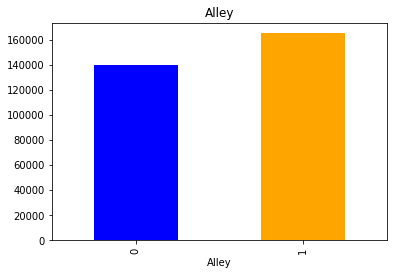

Text(0.5, 1.0, 'MasVnrType')

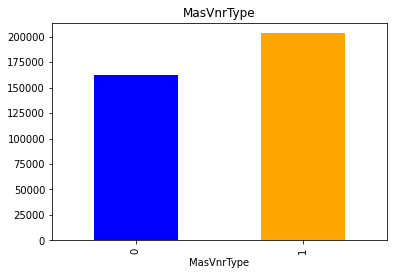

Text(0.5, 1.0, 'MasVnrArea')

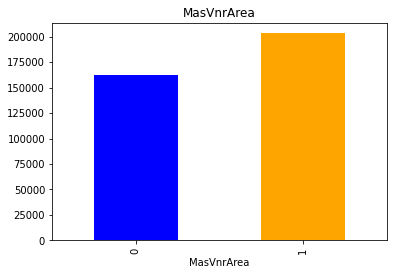

Text(0.5, 1.0, 'BsmtQual')

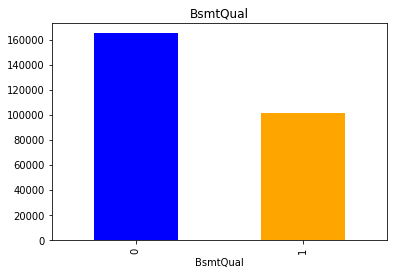

Text(0.5, 1.0, 'BsmtCond')

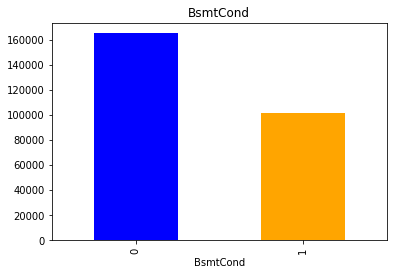

Text(0.5, 1.0, 'BsmtExposure')

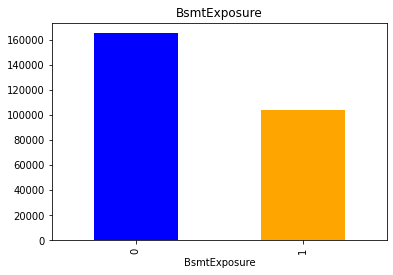

Text(0.5, 1.0, 'BsmtFinType1')

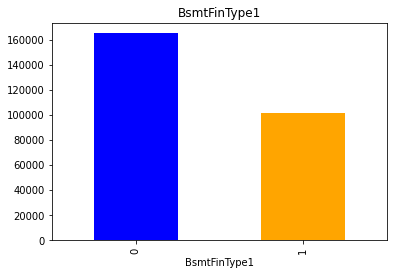

Text(0.5, 1.0, 'BsmtFinType2')

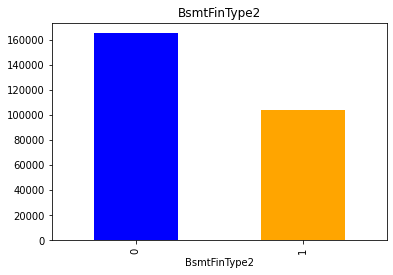

Text(0.5, 1.0, 'FireplaceQu')

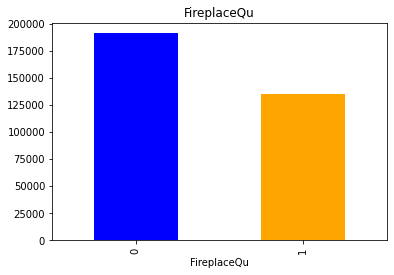

Text(0.5, 1.0, 'GarageType')

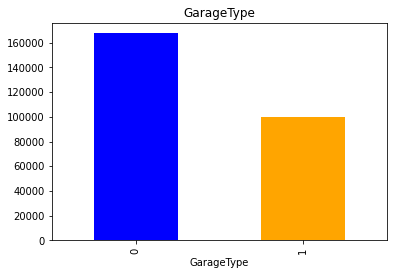

Text(0.5, 1.0, 'GarageYrBlt')

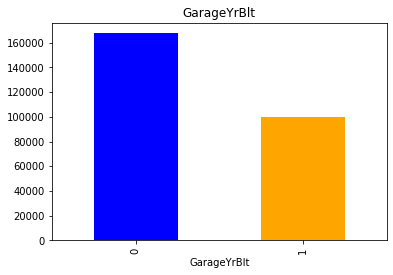

Text(0.5, 1.0, 'GarageFinish')

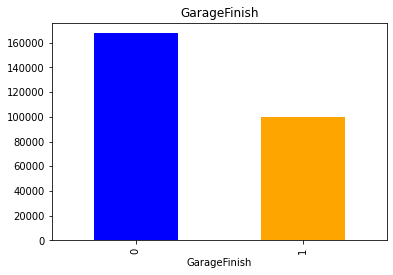

Text(0.5, 1.0, 'GarageQual')

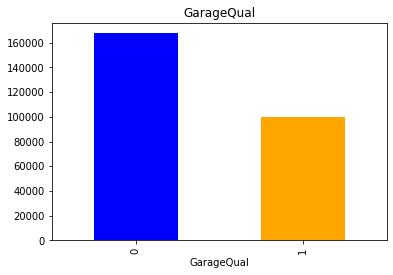

Text(0.5, 1.0, 'GarageCond')

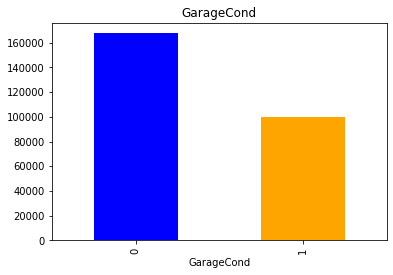

Text(0.5, 1.0, 'PoolQC')

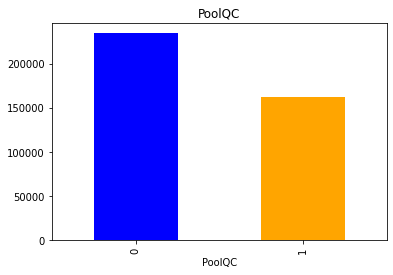

Text(0.5, 1.0, 'Fence')

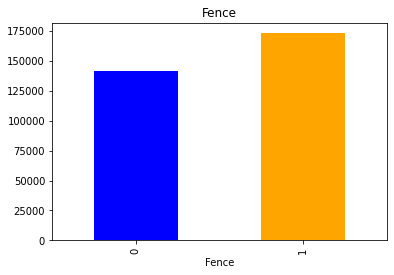

Text(0.5, 1.0, 'MiscFeature')

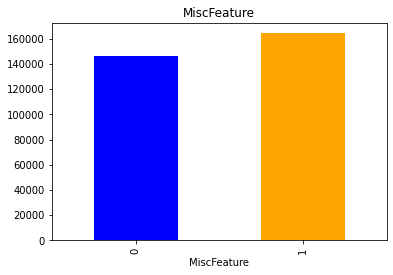

In [8]:
data = dataset.copy()
for feature in features_with_na:
  # lets create a vaiable that indicates 1 if observation are missing or 0
  data[feature] = np.where(data[feature].isnull(),1,0)
  # calculate mean SalePrice where the information is missing or present
  data.groupby(feature)['SalePrice'].median().plot.bar(color=['blue','orange'])
  plt.title(feature)
  plt.show()

# observation
# we can clearly see that NAN values(1 value in X axis) have higher Sale Price.
 

Finding Numerical Variables

In [9]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype!='O']
print(f"Number of numerial_features is {len(numerical_features)}")

# visualize numerical features
dataset[numerical_features].head()

Number of numerial_features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Finding all features with Yr and Year perfix in numerical_feature dataset

In [10]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
# lets explore the content of these features
for feature in year_feature:
  print(f"{feature},{(dataset[feature].unique())}") 

YearBuilt,[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd,[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt,[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Data Analysis

Text(0.5, 0, 'Year Sold')

Text(0, 0.5, 'Medain House Price')

Text(0.5, 1.0, 'House Price vs YearSold')

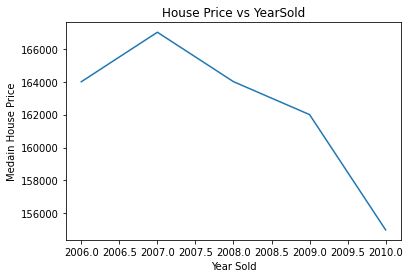

In [12]:
# checking relationship between year the house is sold with Sales Price of the house
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Medain House Price')
plt.title('House Price vs YearSold')

# observation
# as year is increasing House Price is decreasing which should not be as per real scenario 

Text(0.5, 0, 'YearBuilt')

Text(0, 0.5, 'SalePrice')

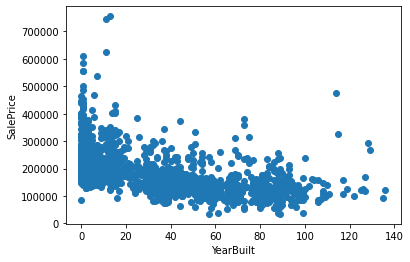

Text(0.5, 0, 'YearRemodAdd')

Text(0, 0.5, 'SalePrice')

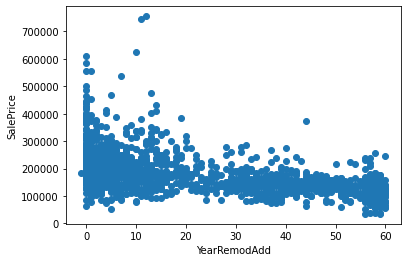

Text(0.5, 0, 'GarageYrBlt')

Text(0, 0.5, 'SalePrice')

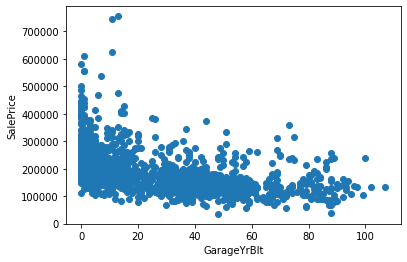

In [13]:
# compare the difference between all year feature with Sale Price
data = dataset.copy()
for feature in year_feature:
  if feature!='YrSold':
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# observation we can see costing for building,removing,garage has incresed significantly high in recent years as compared to 100 years back



Finding discreate features


In [14]:
# Assumptions --> Feature containing 25 unique values each are in the category of dicreate feature
discreate_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
discreate_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [15]:
dataset[discreate_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


<BarContainer object of 1460 artists>

Text(0.5, 0, 'MSSubClass')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'MSSubClass')

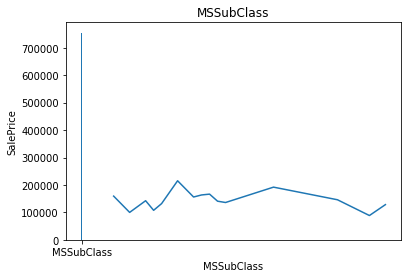

<BarContainer object of 1460 artists>

Text(0.5, 0, 'OverallQual')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'OverallQual')

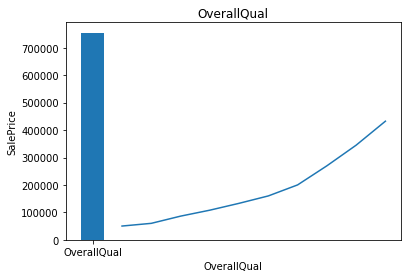

<BarContainer object of 1460 artists>

Text(0.5, 0, 'OverallCond')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'OverallCond')

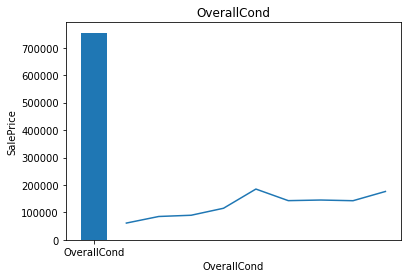

<BarContainer object of 1460 artists>

Text(0.5, 0, 'LowQualFinSF')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'LowQualFinSF')

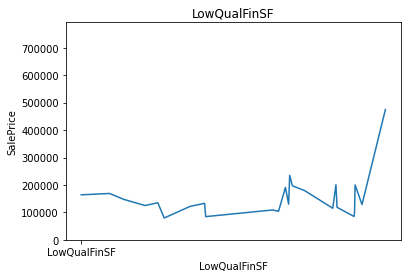

<BarContainer object of 1460 artists>

Text(0.5, 0, 'BsmtFullBath')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'BsmtFullBath')

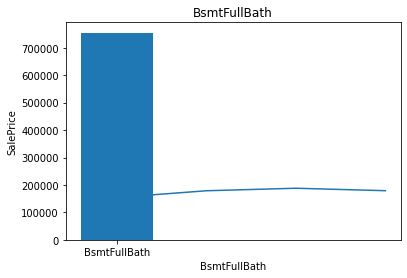

<BarContainer object of 1460 artists>

Text(0.5, 0, 'BsmtHalfBath')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'BsmtHalfBath')

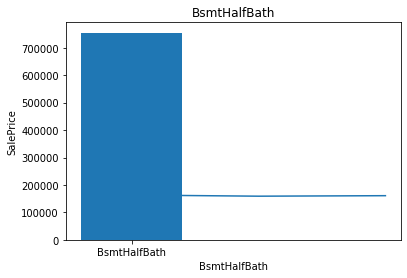

<BarContainer object of 1460 artists>

Text(0.5, 0, 'FullBath')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'FullBath')

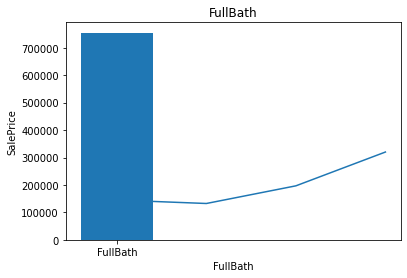

<BarContainer object of 1460 artists>

Text(0.5, 0, 'HalfBath')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'HalfBath')

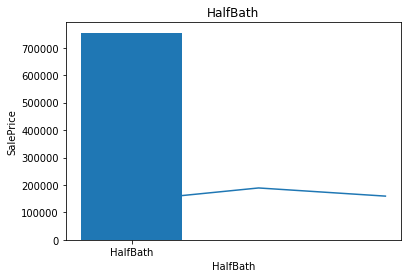

<BarContainer object of 1460 artists>

Text(0.5, 0, 'BedroomAbvGr')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'BedroomAbvGr')

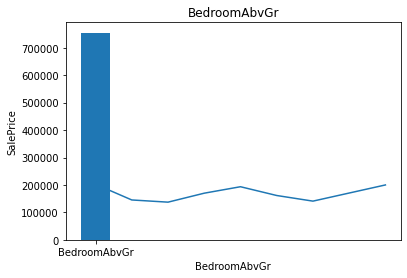

<BarContainer object of 1460 artists>

Text(0.5, 0, 'KitchenAbvGr')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'KitchenAbvGr')

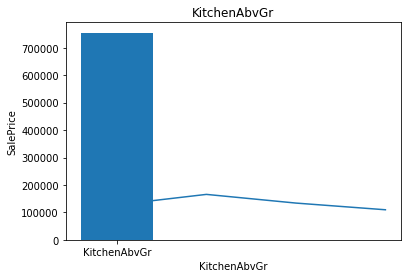

<BarContainer object of 1460 artists>

Text(0.5, 0, 'TotRmsAbvGrd')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'TotRmsAbvGrd')

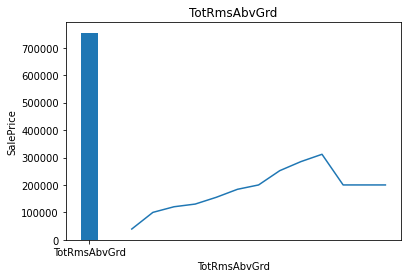

<BarContainer object of 1460 artists>

Text(0.5, 0, 'Fireplaces')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'Fireplaces')

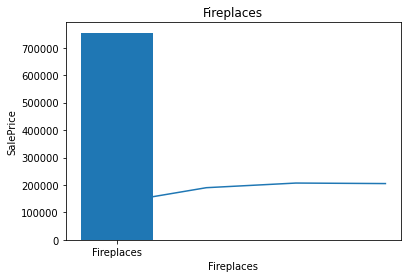

<BarContainer object of 1460 artists>

Text(0.5, 0, 'GarageCars')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'GarageCars')

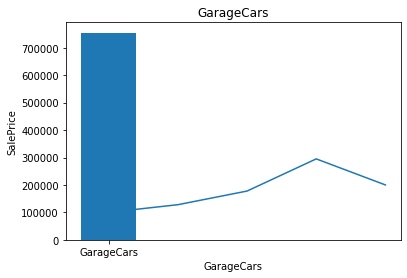

<BarContainer object of 1460 artists>

Text(0.5, 0, '3SsnPorch')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, '3SsnPorch')

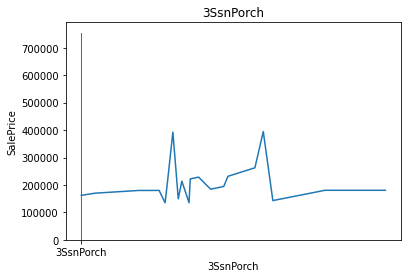

<BarContainer object of 1460 artists>

Text(0.5, 0, 'PoolArea')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'PoolArea')

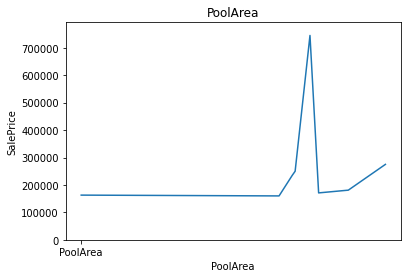

<BarContainer object of 1460 artists>

Text(0.5, 0, 'MiscVal')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'MiscVal')

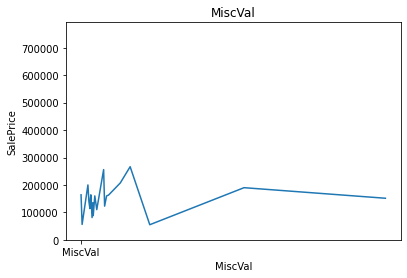

<BarContainer object of 1460 artists>

Text(0.5, 0, 'MoSold')

Text(0, 0.5, 'SalePrice')

Text(0.5, 1.0, 'MoSold')

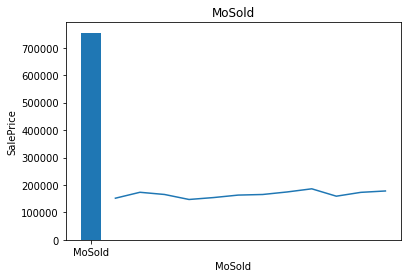

In [28]:
# find relation between discreate feature and sales Price
data = dataset.copy()
for feature in discreate_feature:
  # f1 = dataset[discreate_feature]
  # s1 = dataset['SalePrice']
  data.groupby(feature)['SalePrice'].median().plot().bar(feature,dataset['SalePrice'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()